In [32]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import pandas as pd
from contrastive_loss import ContrastiveLoss
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from my_umap import UMAP

Prepare Penguins data set.

In [5]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.dropna()
#print(penguins.head())
penguin_data = penguins[
[
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

Instastiate UMAP instance.

In [10]:
reducer = umap.UMAP(n_neighbors=15, n_epochs=500, verbose=False)
embedding = reducer.fit_transform(scaled_penguin_data)

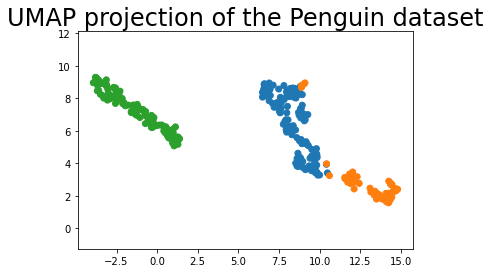

In [11]:
plt.scatter(
embedding[:, 0],
embedding[:, 1],
c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)
plt.show()

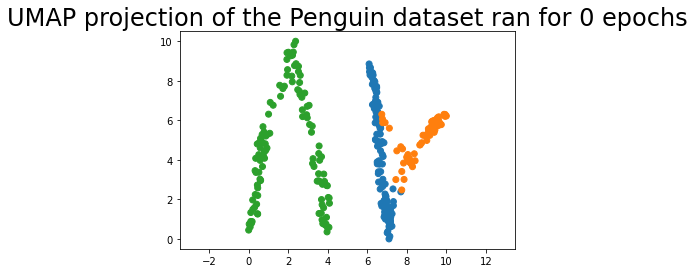

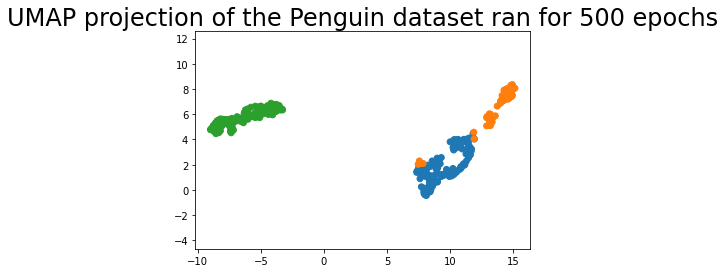

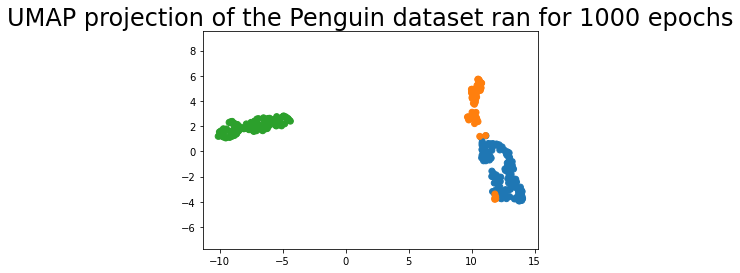

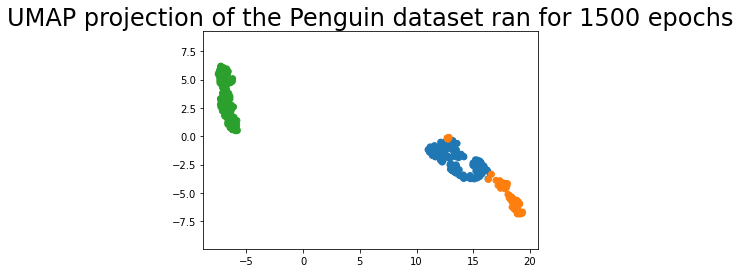

In [16]:
for i in range(0,2000,500):
    reducer = umap.UMAP(n_neighbors=15, n_epochs=i, verbose=False)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
        
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Penguin dataset ran for ' + str(i) + ' epochs', fontsize=24)
    plt.show()

In [47]:
x_vals = []
losses = []
labels = [x for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
myLoss = ContrastiveLoss(margin=5)
for i in range(0,100,5):
    x_vals.append(i)
    reducer = umap.UMAP(n_neighbors=15, n_epochs=i, verbose=False)
    embedding = reducer.fit_transform(scaled_penguin_data)
    losses.append(myLoss.get_loss(embedding, labels))
    

    

Text(0.5, 1.0, 'Epochs vs Contrastive Loss for UMAP')

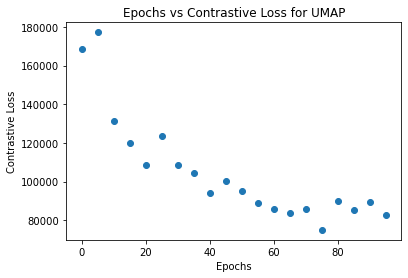

In [48]:
plot, axes = plt.subplots()
axes.scatter(x_vals, losses)

axes.set_xlabel('Epochs')
axes.set_ylabel('Contrastive Loss')  
axes.set_title("Epochs vs Contrastive Loss for UMAP")

In [45]:
x_vals = []
losses = []
labels = [x for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
myLoss = ContrastiveLoss(margin=10)
for i in range(0,100,5):
    x_vals.append(i)
    myUmap = UMAP(n_neighbors = 15, dims=2, min_dist=.1, epochs=i)
    myUmap.fit(scaled_penguin_data)
    embedding = myUmap.Y
    losses.append(myLoss.get_loss(embedding, labels))

/Users/daniel/Desktop/CP307/dimensional-reduction/my_umap.py:62: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


Text(0.5, 1.0, 'Epochs vs Contrastive Loss for UMAP')

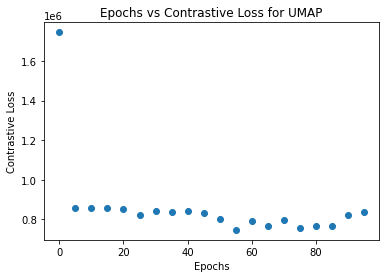

In [46]:
plot, axes = plt.subplots()
axes.scatter(x_vals, losses)

axes.set_xlabel('Epochs')
axes.set_ylabel('Contrastive Loss')  
axes.set_title("Epochs vs Contrastive Loss for UMAP")

In [40]:
labels = [x for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]

/Users/daniel/Desktop/CP307/dimensional-reduction/my_umap.py:62: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


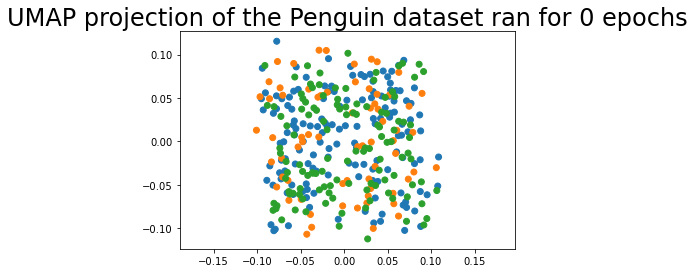

1745479.1396822163


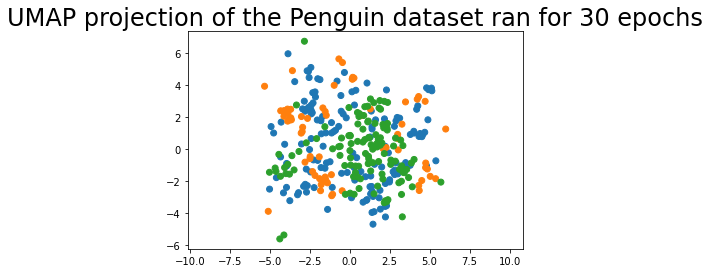

846875.6346463485


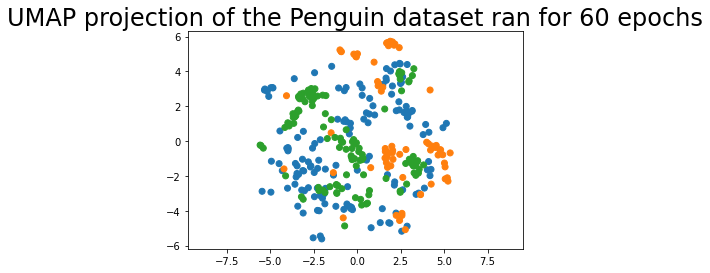

801935.250173333


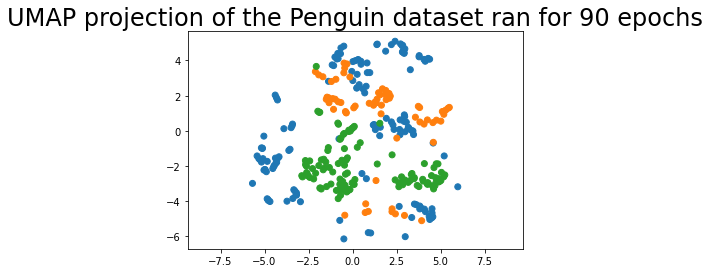

793161.3751809566


In [44]:
myLoss = ContrastiveLoss(margin=10)
for i in range(0,100,30):
    myUmap = UMAP(n_neighbors = 15, dims=2, min_dist=.1, epochs=i)
    myUmap.fit(scaled_penguin_data)
    embedding = myUmap.Y
    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
        
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Penguin dataset ran for ' + str(i) + ' epochs', fontsize=24)
    plt.show()
    print(myLoss.get_loss(embedding, labels))

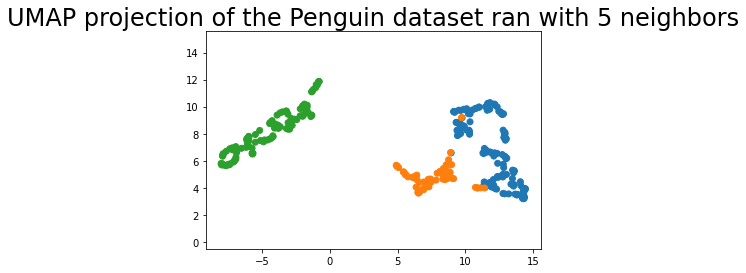

260309.05505672295


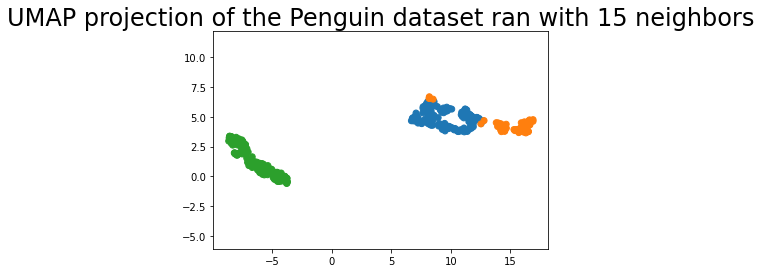

185956.62631082523


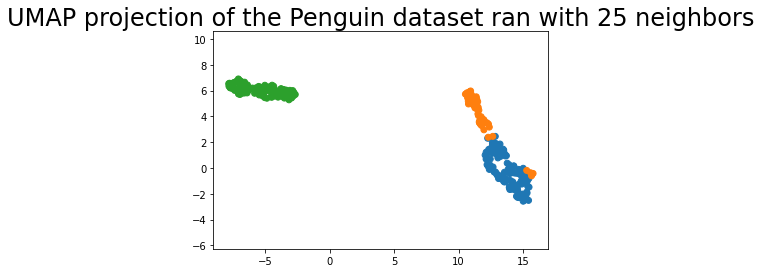

188565.23293929506


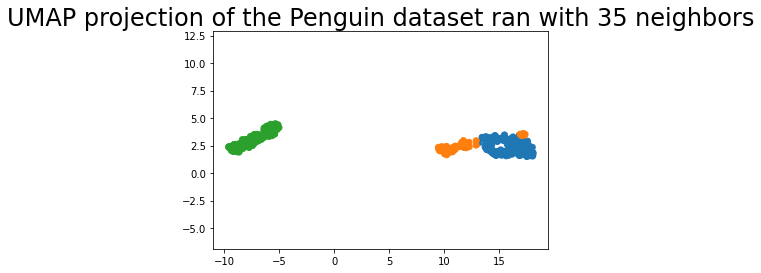

197694.17209074594


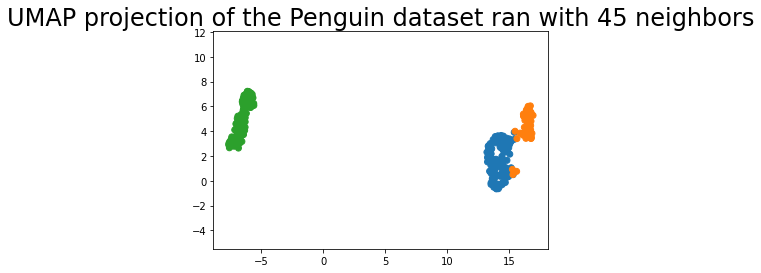

238847.92293198028


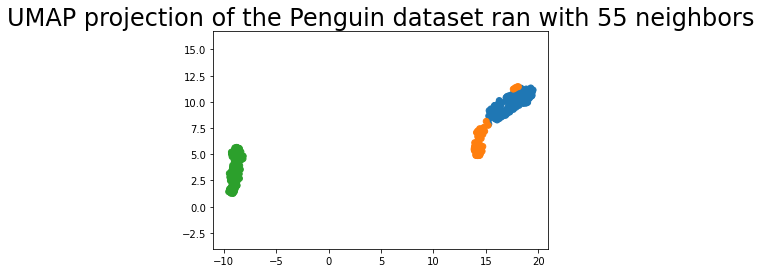

196916.21949413393


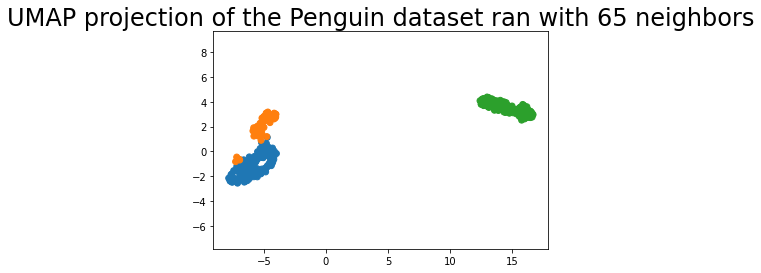

248039.64423709305


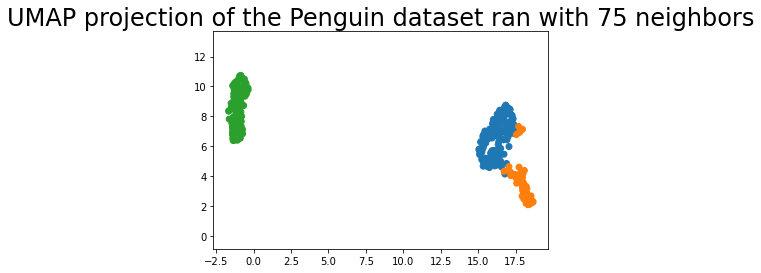

237676.47605080227


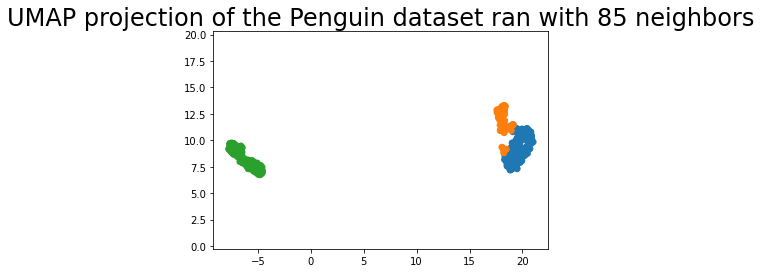

256814.1367715338


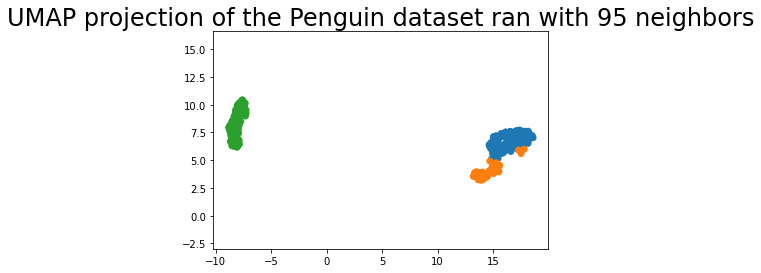

245221.19009488673


In [52]:
myLoss = ContrastiveLoss(margin=10)
for i in range(5,100,10):
    reducer = umap.UMAP(n_neighbors=i, n_epochs=500, verbose=False)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
        
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Penguin dataset ran with ' + str(i) + ' neighbors', fontsize=24)
    plt.show()
    print(myLoss.get_loss(embedding, labels))

In [2]:
import experiment_helpers

In [3]:
train_data, train_label, test_data, test_label = experiment_helpers.get_Data()

In [ ]:
x_vals = []
losses = []
myLoss = ContrastiveLoss(margin=5)
for i in range(0,100,5):
    x_vals.append(i)
    reducer = umap.UMAP(n_neighbors=15, n_epochs=i, verbose=False)
    embedding = reducer.fit_transform(train_data)
    losses.append(myLoss.get_loss(embedding, train_labels))

In [3]:
epochs, neighbors, min_dist = experiment_helpers.umap_coordinate_descent(train_data,train_label)

174 56315.23483401943
47 26849.805590655287
0.19071709293930333 30076.32577622391
inf
26849.805590655287

809 25442.640197683577
44 24810.16460507161
0.060629525010490536 23703.785760015155
26849.805590655287
23703.785760015155

672 23964.716811707327
42 24274.39202416489
0.02687650833683018 23019.126874747275
23703.785760015155
23019.126874747275

492 23346.884057714786
47 21392.34415712609
0.16985658141213933 27305.59827317923
23019.126874747275
21392.34415712609

852 22522.884783044166
34 26293.97990398921
0.02687650833683018 22868.34589841975
21392.34415712609
21392.34415712609

Epochs: 809
Neighbors: 47
min-dist: 0.02687650833683018


In [4]:
epochs_list = []
neighbors_list = []
mins_list = []
losses = []
for i in range(10):
    e, n, min, s = experiment_helpers.umap_coordinate_descent(train_data,train_label)
    epochs_list.append(e)
    neighbors_list.append(n)
    mins_list.append(min)
    losses.append(s)



852 40924.416991350365
40 27650.20293868618
0.060629525010490536 25319.16881376999
inf
25319.16881376999

1546 23825.986259951595
44 23463.335309653336
0.02687650833683018 21829.15884377424
25319.16881376999
21829.15884377424

1392 21425.67394780899
32 24586.708158044206
0.02687650833683018 20885.02640468766
21829.15884377424
20885.02640468766

1461 22440.66751738763
44 22420.64608294982
0.02687650833683018 21340.859504121603
20885.02640468766
20885.02640468766

Epochs: 1392
Neighbors: 44
min-dist: 0.02687650833683018
1409 40640.58596486633
47 24160.850313922165
0.10235054806481861 24024.849457573084
inf
24024.849457573084

852 24567.899491735832
34 28220.127748231072
0.08149003653765455 22735.978328266698
24024.849457573084
22735.978328266698

783 25376.478043614658
47 22629.66667047203
0.02687650833683018 19782.094433641083
22735.978328266698
19782.094433641083

1281 20863.80675847936
40 21670.421590552156
0.0477370198639942 22654.845921212378
19782.094433641083
19782.094433641083

E

KeyboardInterrupt: 